# Import Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
tfds.__version__

'4.9.2'

# Load The Data

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*Nv2NNALuokZEcV6hYEHdGA.png" alt="Örnek Görsel" width="600" height="200">

In [ ]:
dataset_name = 'plant_village'

# tfds.load(dataset_name , split = ['train'] , as_supervised = True )

train_ds , valid_ds , test_ds = tfds.load(dataset_name , split = ['train[:70%]' , 'train[70%:80%]' , 'train[80%:]'] , as_supervised = True )

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Shuffling /root/tensorflow_datasets/plant_village/1.0.2.incompleteDSA1TQ/plant_village-train.tfrecord*...:   0…

Dataset plant_village downloaded and prepared to /root/tensorflow_datasets/plant_village/1.0.2. Subsequent calls will reuse this data.


In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
train_ds.element_spec

(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [ ]:
dataset_name = 'plant_village'
data_builder = tfds.builder(dataset_name)

data_info = data_builder.info

class_labels = data_info.features['label'].names
classes = {label_idx : class_label for label_idx , class_label in enumerate(class_labels)}

In [ ]:
classes

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry___healthy',
 6: 'Cherry___Powdery_mildew',
 7: 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn___Common_rust',
 9: 'Corn___healthy',
 10: 'Corn___Northern_Leaf_Blight',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___healthy',
 14: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___healthy',
 22: 'Potato___Late_blight',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___healthy',
 27: 'Strawberry___Leaf_scorch',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: 'Tomato___healthy',
 31: 'Tomato___Late_blight',
 32: 'Tomato___Leaf

In [ ]:
total_class = 38

# Lets See Some Examples

### Bilgisayarlar Nasıl Görür

<img src="https://d3caycb064h6u1.cloudfront.net/wp-content/uploads/2021/06/facebookcv.jpg" alt="Örnek Görsel" width="1000" height="400">

In [ ]:
next(iter(train_ds))

(<tf.Tensor: shape=(256, 256, 3), dtype=uint8, numpy=
 array([[[171, 161, 169],
         [158, 148, 156],
         [153, 143, 151],
         ...,
         [144, 133, 137],
         [130, 119, 123],
         [151, 140, 144]],
 
        [[164, 154, 162],
         [158, 148, 156],
         [161, 151, 159],
         ...,
         [131, 120, 124],
         [ 86,  75,  79],
         [104,  93,  97]],
 
        [[150, 140, 148],
         [155, 145, 153],
         [161, 151, 159],
         ...,
         [101,  90,  94],
         [ 90,  79,  83],
         [124, 113, 117]],
 
        ...,
 
        [[176, 165, 169],
         [160, 149, 153],
         [163, 152, 156],
         ...,
         [158, 146, 146],
         [137, 125, 125],
         [112, 100, 100]],
 
        [[171, 160, 164],
         [190, 179, 183],
         [151, 140, 144],
         ...,
         [149, 137, 137],
         [140, 128, 128],
         [105,  93,  93]],
 
        [[142, 131, 135],
         [182, 171, 175],
         [173,

In [ ]:
next(iter(train_ds))[0].numpy()

array([[[171, 161, 169],
        [158, 148, 156],
        [153, 143, 151],
        ...,
        [144, 133, 137],
        [130, 119, 123],
        [151, 140, 144]],

       [[164, 154, 162],
        [158, 148, 156],
        [161, 151, 159],
        ...,
        [131, 120, 124],
        [ 86,  75,  79],
        [104,  93,  97]],

       [[150, 140, 148],
        [155, 145, 153],
        [161, 151, 159],
        ...,
        [101,  90,  94],
        [ 90,  79,  83],
        [124, 113, 117]],

       ...,

       [[176, 165, 169],
        [160, 149, 153],
        [163, 152, 156],
        ...,
        [158, 146, 146],
        [137, 125, 125],
        [112, 100, 100]],

       [[171, 160, 164],
        [190, 179, 183],
        [151, 140, 144],
        ...,
        [149, 137, 137],
        [140, 128, 128],
        [105,  93,  93]],

       [[142, 131, 135],
        [182, 171, 175],
        [173, 162, 166],
        ...,
        [141, 129, 129],
        [157, 145, 145],
        [134, 122, 122]]

In [ ]:
next(iter(train_ds))[1]

<tf.Tensor: shape=(), dtype=int64, numpy=35>

Text(0.5, 1.0, 'Tomato___Target_Spot')

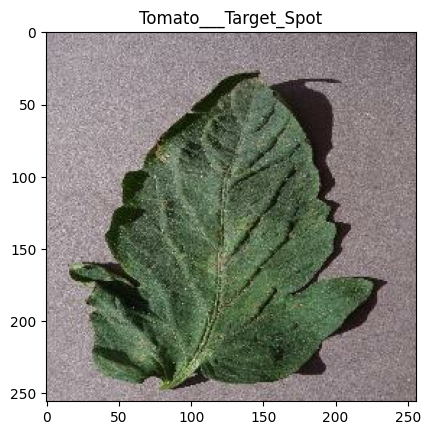

In [ ]:
plt.imshow(next(iter(train_ds))[0].numpy())

plt.title(classes[next(iter(train_ds))[1].numpy()])

# Data Preprocess(Veri Ön Hazırlık)

* Resize Images
* Scale Images
* Train | Test Split

<img src="https://imgv3.fotor.com/images/side/Fotors-free-resize-image-app.jpg" alt="Örnek Görsel" width="1000" height="400">

In [ ]:
# Scale ölçeklendirme demek. Yüksek sayıları daha küçük 0-1 arasındaki sayılara döndürme işlemi.

In [ ]:
def preprocess_images(image, label):
    image = tf.image.resize(image , (224,224)) # Resize
    image = image / 255 # Scale
    return image , label

In [ ]:
# 4 Önemli İşlem vardır.
# shuffle --> batch --> map --> prefetch

In [ ]:
len(train_ds)

38012

In [ ]:
pp_train_ds = train_ds.shuffle(len(train_ds)).batch(64).map(preprocess_images).prefetch(tf.data.AUTOTUNE)
pp_valid_ds = valid_ds.shuffle(len(valid_ds)).batch(64).map(preprocess_images).prefetch(tf.data.AUTOTUNE)
pp_test_ds = test_ds.shuffle(len(test_ds)).batch(64).map(preprocess_images).prefetch(tf.data.AUTOTUNE)

In [ ]:
next(iter(pp_train_ds))

(<tf.Tensor: shape=(64, 224, 224, 3), dtype=float32, numpy=
 array([[[[0.58987594, 0.51144457, 0.5467387 ],
          [0.61158466, 0.5331533 , 0.5684474 ],
          [0.62763107, 0.5491997 , 0.5844938 ],
          ...,
          [0.49587828, 0.4174469 , 0.42529005],
          [0.47567013, 0.39723876, 0.4050819 ],
          [0.4497995 , 0.37136814, 0.37921128]],
 
         [[0.5994798 , 0.52104837, 0.5563425 ],
          [0.6082433 , 0.5298119 , 0.56510603],
          [0.6117647 , 0.53333336, 0.5686275 ],
          ...,
          [0.48289317, 0.4044618 , 0.41230494],
          [0.47901157, 0.4005802 , 0.40842333],
          [0.4700679 , 0.39163652, 0.39947966]],
 
         [[0.62715083, 0.54871947, 0.5840136 ],
          [0.6173269 , 0.53889555, 0.57418966],
          [0.6089636 , 0.53053224, 0.56582636],
          ...,
          [0.48307323, 0.40464187, 0.412485  ],
          [0.48875555, 0.4103242 , 0.41816732],
          [0.49643868, 0.4180073 , 0.42585045]],
 
         ...,
 
      

# Modelling

# ANN

<img src="https://editor.analyticsvidhya.com/uploads/25366Convolutional_Neural_Network_to_identify_the_image_of_a_bird.png" alt="Örnek Görsel" width="1000" height="350">

In [ ]:
# Sequential API ile Model Kurulumu

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten , Dropout , InputLayer


ann_model = Sequential([
    InputLayer((224,224,3)),

    Flatten(),

    Dense(256 , activation = 'relu'),
    Dropout(0.2),
    Dense(128 , activation = 'relu'),
    Dropout(0.2),
    Dense(64 , activation = 'relu'),
    Dropout(0.1),

    Dense(total_class , activation = 'softmax')
])

ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 256)               38535424  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [ ]:
ann_model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['acc'] )

ann_model.fit(pp_train_ds , epochs = 3 , validation_data = pp_valid_ds )

Epoch 1/3
594/594 [==============================] - 20s 16ms/step - loss: 3.8939 - acc: 0.1074 - val_loss: 3.3574 - val_acc: 0.1026
Epoch 2/3
594/594 [==============================] - 14s 16ms/step - loss: 3.3549 - acc: 0.0987 - val_loss: 3.3519 - val_acc: 0.1026
Epoch 3/3
594/594 [==============================] - 13s 16ms/step - loss: 3.3500 - acc: 0.1014 - val_loss: 3.3516 - val_acc: 0.1029


# Basic CNN

<img src="https://d33wubrfki0l68.cloudfront.net/a7664cf19de33b2c71a482629f27a0d70f715b77/6949d/images/blog/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way.jpg" alt="Örnek Görsel" width="1000" height="350">

In [ ]:
from tensorflow.keras.layers import Conv2D , MaxPooling2D , GlobalMaxPool2D

basic_cnn_model = Sequential([
    InputLayer((224,224,3)),

    Conv2D(16 , 3 , padding = 'same' , activation = 'relu'),
    MaxPooling2D((3,3)),

    Conv2D(16 , 3 , padding = 'same' , activation = 'relu'),
    MaxPooling2D((3,3)),

    Flatten(),

    Dense(64 , activation = 'relu'),

    Dense(total_class , activation = 'softmax')
])

basic_cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [ ]:
basic_cnn_model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['acc'] )

basic_cnn_model.fit(pp_train_ds , epochs = 8 , validation_data = pp_valid_ds )

Epoch 1/8
594/594 [==============================] - 21s 19ms/step - loss: 1.4567 - acc: 0.5967 - val_loss: 0.9174 - val_acc: 0.7287
Epoch 2/8
594/594 [==============================] - 14s 18ms/step - loss: 0.6784 - acc: 0.7935 - val_loss: 0.5907 - val_acc: 0.8096
Epoch 3/8
594/594 [==============================] - 14s 18ms/step - loss: 0.5120 - acc: 0.8429 - val_loss: 0.5467 - val_acc: 0.8293
Epoch 4/8
594/594 [==============================] - 14s 18ms/step - loss: 0.4347 - acc: 0.8644 - val_loss: 0.4661 - val_acc: 0.8532
Epoch 5/8
594/594 [==============================] - 14s 18ms/step - loss: 0.3588 - acc: 0.8875 - val_loss: 0.4287 - val_acc: 0.8637
Epoch 6/8
594/594 [==============================] - 15s 18ms/step - loss: 0.3058 - acc: 0.9037 - val_loss: 0.5363 - val_acc: 0.8344
Epoch 7/8
594/594 [==============================] - 14s 18ms/step - loss: 0.2585 - acc: 0.9174 - val_loss: 0.4197 - val_acc: 0.8694
Epoch 8/8
594/594 [==============================] - 14s 18ms/step - 

In [ ]:
basic_cnn_model.evaluate(pp_test_ds)

170/170 [==============================] - 4s 14ms/step - loss: 0.4273 - acc: 0.8738


[0.427264928817749, 0.8737685084342957]

In [ ]:
# Done.

## Transfer Learning
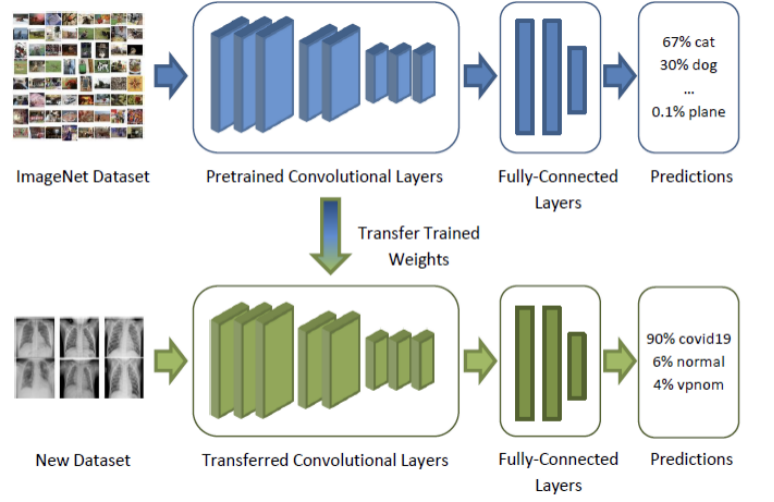

In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
def resize_images(image, label):
    image = tf.image.resize(image, [224, 224])

    return image, label

train_ds_resized = train_ds.shuffle(5000).batch(128).map(resize_images).prefetch(tf.data.AUTOTUNE)
valid_ds_resized = valid_ds.shuffle(5000).batch(128).map(resize_images).prefetch(tf.data.AUTOTUNE)
test_ds_resized = test_ds.shuffle(5000).batch(128).map(resize_images).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_ds_resized

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
# Labellar integer ise --> SparseCategoricalCrossEntropy
# Labellar OHE --> CategoricalCrossEntropy

In [ ]:
# Functional API
input_layer = tf.keras.Input((224, 224, 3))

In [ ]:
input_layer

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_3')>

In [ ]:
# Pretrained modeller
base_model = tf.keras.applications.ConvNeXtTiny(
    include_top=False, 
    include_preprocessing=True,
    weights='imagenet',
    input_tensor=input_layer
)

111650432/111650432 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

In [ ]:
base_model.output

<KerasTensor: shape=(None, 7, 7, 768) dtype=float32 (created by layer 'layer_normalization')>

In [ ]:
global_pooling = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

x = tf.keras.layers.Dense(64, activation = "relu")(global_pooling)
x = tf.keras.layers.Dropout(0.2)(x) # Parantez (x) unutulursa --> Graph disconnected hatası verir.
outputs = tf.keras.layers.Dense(total_class, activation = "softmax")(x) #output_layer da olabilirdi.

In [ ]:
tl_model = tf.keras.Model(input_layer, outputs)
tl_model.summary()

In [ ]:
tl_model.compile(optimizer = "adam", 
                 loss = "sparse_categorical_crossentropy",
                 metrics = ["acc"])

In [ ]:
tl_model.fit(train_ds_resized, epochs = 10, validation_data = valid_ds_resized)

Epoch 1/10
297/297 [==============================] - 236s 596ms/step - loss: 0.3409 - acc: 0.9084 - val_loss: 0.0907 - val_acc: 0.9702
Epoch 2/10
297/297 [==============================] - 151s 505ms/step - loss: 0.0663 - acc: 0.9821 - val_loss: 0.0570 - val_acc: 0.9829
Epoch 3/10
 13/297 [>.............................] - ETA: 2:17 - loss: 0.0701 - acc: 0.9832

## Task: Farklı TL Modeli Eğitme
`tf.keras.applications` modulu altından istediğiniz farklı bir modeli alıp, aynı yukarıdaki gibi Functional API ile kurup, sonuçları karşılaştırın.

* Densenet olabilir
* ResNet olabilir
...

* ConvNeXt ağır olabilir, Den